In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [6]:
train.shape

(891, 12)

In [7]:
# 데이터의 컬럼 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
survived_rate = train.Survived.mean() * 100
print('생존율 :',round(survived_rate,1),'%')

생존율 : 38.4 %


In [7]:
# 생존자 : 342명, 사망자 : 549명
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
# 실습하기
# 성별에 따른 생존자의 수를 구해주세요
train.loc[train.Survived==1,:].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [10]:
# 실습하기
# 성별에 따른 사망자의 수를 구해주세요
train.loc[train.Survived==0, : ].Sex.value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [11]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
import seaborn as sns

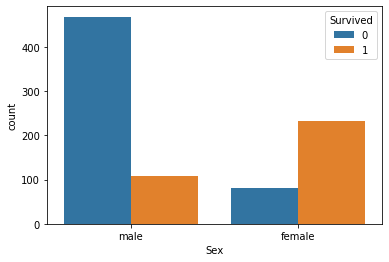

In [13]:
sns.countplot(data=train,x='Sex', hue='Survived')

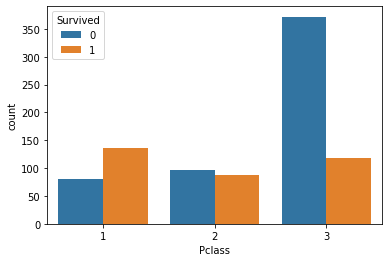

In [21]:
sns.countplot(x="Pclass", hue="Survived", data=train)

In [22]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [23]:
train.loc[train.Survived==0, : ].Pclass.value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [24]:
#3등급에서 죽은 비율
372/491

0.7576374745417516

In [25]:
#2등급에서 죽은 비율
97/184

0.5271739130434783

In [26]:
#1등급에서 죽은 비율
80/216

0.37037037037037035

In [27]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


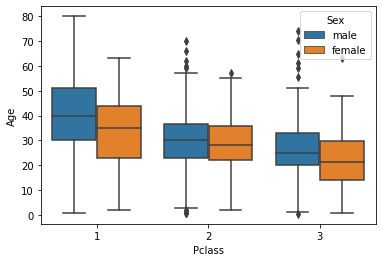

In [36]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train)

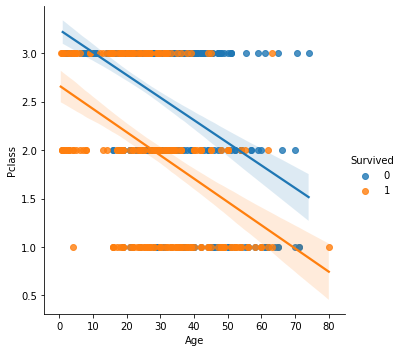

In [40]:

sns.lmplot(data=low_fare, x='Age', y='Pclass', hue='Survived')

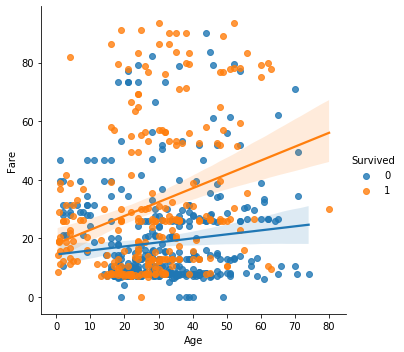

In [42]:
low_fare = train.loc[train.Fare <100,:]
sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived')

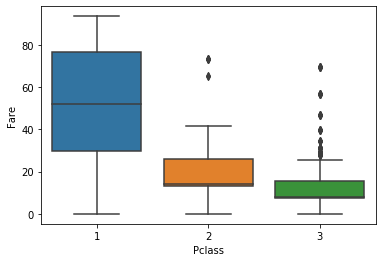

In [78]:
low_fare = train.loc[train.Fare <100,:]

sns.boxplot(x='Pclass', y='Fare', data=low_fare)

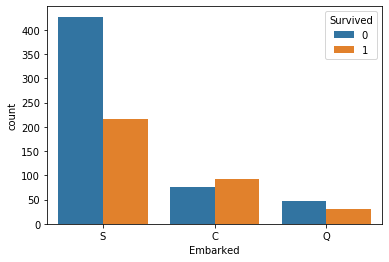

In [53]:
sns.countplot(data=train,x='Embarked',hue='Survived')
# 탑승 항구 별 생존

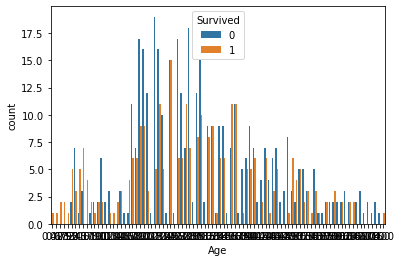

In [54]:
sns.countplot(data=train,x='Age', hue='Survived')

In [55]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train['Embarked'].fillna('S', inplace=True)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
# 필요없는 컬럼 삭제
train = train.drop(['Cabin'],axis=1)

In [11]:
test = test.drop(['Cabin'],axis=1)

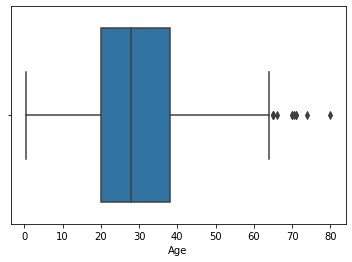

In [14]:
sns.boxplot(x='Age', hue='Survived', data=train)

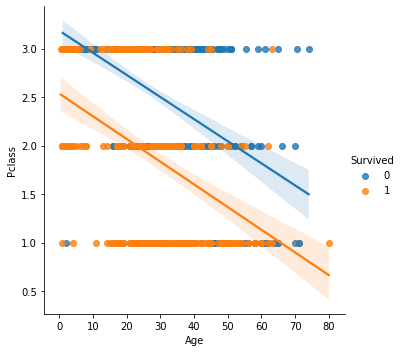

In [16]:

sns.lmplot(data=train, x='Age', y='Pclass', hue='Survived')

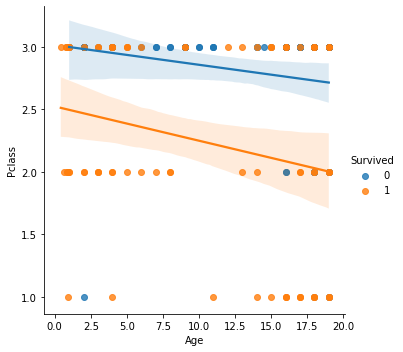

In [19]:
low_age = train.loc[train.Age <20,:]
sns.lmplot(data=low_age, x='Age', y='Pclass', hue='Survived')

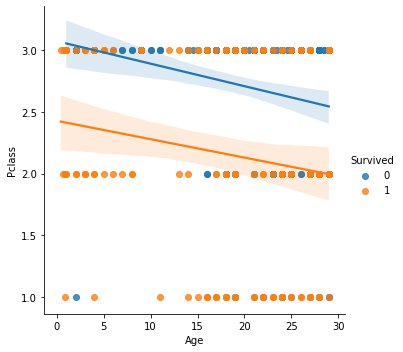

In [21]:
low_age = train.loc[train.Age <30,:]
sns.lmplot(data=low_age, x='Age', y='Pclass', hue='Survived')

In [22]:
mean(train[Pclass])

NameError: name 'mean' is not defined

In [31]:
train.loc[train['Pclass']==1,'Age'].mean()

38.233440860215055

In [32]:
train.loc[train['Pclass']==2,'Age'].mean()

29.87763005780347

In [33]:
train.loc[train['Pclass']==3,'Age'].mean()

25.14061971830986

In [37]:
if train.loc['Pclass',]==1:
    

    train['Age'].fillna(38, inplace=True)

elif   train['Pclass']==2:
    
    train['Age'].fillna(30, inplace=True)
    
else :
    train['Age'].fillna(25, inplace=True)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [48]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [53]:
fill_mean_func= lambda g: g.fillna(g.mean())
train = train.groupby('Pclass').apply(fill_mean_func)    

In [64]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_band       0
Age_cut        0
dtype: int64

In [55]:
train['Age_cut']=0

In [61]:
train['Age_cut']=pd.cut(train.Age, bins=[0,10,20,30,40,50,60,200],labels=['kids','10s','20s','30s','40s','50s','els'])

In [62]:
train.Age_cut.value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_cut
20s,377
30s,185
10s,115
40s,86
kids,64
50s,42
els,22


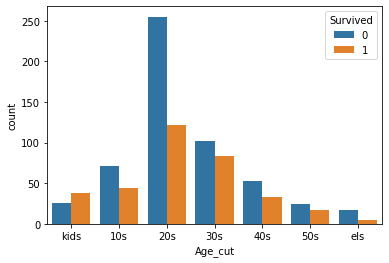

In [63]:
sns.countplot(data=train,x='Age_cut', hue='Survived')

In [65]:
train['family_size'] = train.SibSp + train.Parch
# family_size에 동반한 가족의 유무를 넣는다

In [66]:
train['is_solo'] = train.family_size.apply(lambda x : 1 if x == 0 else 0)
# 동반한 가족이 없으면 is_solo에 0을 넣음di

In [67]:
train.head()

PassengerId  Survived  Pclass  \
Pclass                                     
1      1             2         1       1   
       3             4         1       1   
       6             7         0       1   
       11           12         1       1   
       23           24         1       1   

                                                        Name     Sex   Age  \
Pclass                                                                       
1      1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
       3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
       6                             McCarthy, Mr. Timothy J    male  54.0   
       11                           Bonnell, Miss. Elizabeth  female  58.0   
       23                       Sloper, Mr. William Thompson    male  28.0   

           SibSp  Parch    Ticket     Fare Embarked  Age_band Age_cut  \
Pclass                                                                  
1      1       1      0  PC 17599  71.2833        C         0     30s   
       3       1      0    113803  53.1000        S         0     30s   
       6       0      0     17463  51.8625        S         0     50s   
       11      0      0    113783  26.5500        S         0     50s   
       23      0      0    113788  35.5000        S         0     20s   

           family_size  is_solo  
Pclass                           
1      1             1        0  
       3             1        0  
       6             0        1  
       11            0        1  
       23            0        1

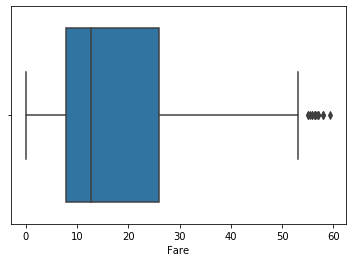

In [74]:
low_fare = train.loc[train.Fare <60]

sns.boxplot(x='Fare', hue='Survived', data=low_fare)

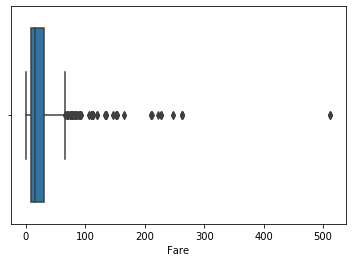

In [76]:
sns.boxplot(x='Fare', hue='Survived', data=train)

In [77]:
train['Fare_cut']=0

In [ ]:
train['Fare_cut']=pd.cut(train.Age, bins=[0,7,8,13,15,26,27,200],labels=['kids','10s','20s','30s','40s','50s','els'])